# Assignment

### DT를 학습시켜 DT graph를 시각화하고 test set에 대한 정확도를 출력하시오.
### 그리고 가장 중요한 feature를 2가지를 선택해서 다시 DT classifier를 학습시키시오.
### 이후  decision boundary를 시각화 하시오.

# 1. graphviz (tree) 결과 첨부

# 2. Accuracy 정확도 출력

# 3. Select most important 2 features (visualize)

# 4. Train DT by only 2 features

# 5. Accuracy (2 features DT)

# 6. Decision Boundary (2 features DT)

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size= 0.2, random_state = 11)

In [28]:
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz
import numpy as np
import os
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [4]:
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.9444444444444444

In [5]:
print(f"정확도:{accuracy_score(y_test, y_pred)}")

정확도:0.9444444444444444


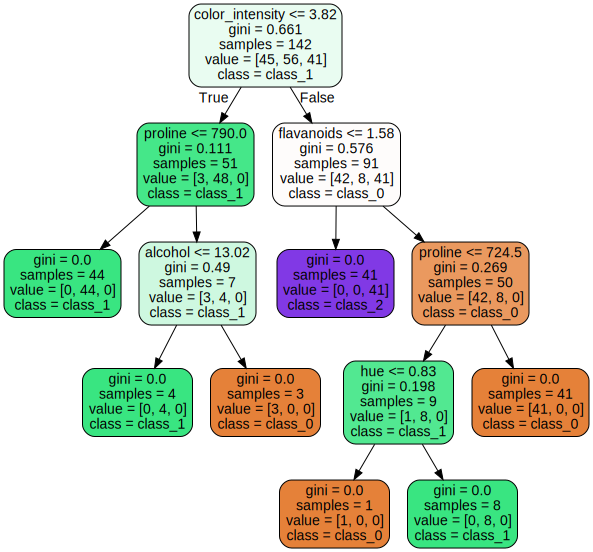

In [6]:
IMAGES_PATH = "./images"

export_graphviz(dt, 
                out_file=os.path.join(IMAGES_PATH, "wine_tree.dot"),
                feature_names=data.feature_names, 
                class_names=data.target_names, 
                filled=True, rounded=True)

graph = graphviz.Source.from_file(os.path.join(IMAGES_PATH, "wine_tree.dot"))
graph

In [7]:
dt.feature_importances_

array([0.03654535, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.41569866, 0.        , 0.        , 0.38085123,
       0.01894944, 0.        , 0.14795532])

In [8]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

C:\Users\sande\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'malic_acid'),
  Text(2, 0, 'ash'),
  Text(3, 0, 'alcalinity_of_ash'),
  Text(4, 0, 'magnesium'),
  Text(5, 0, 'total_phenols'),
  Text(6, 0, 'flavanoids'),
  Text(7, 0, 'nonflavanoid_phenols'),
  Text(8, 0, 'proanthocyanins'),
  Text(9, 0, 'color_intensity'),
  Text(10, 0, 'hue'),
  Text(11, 0, 'od280/od315_of_diluted_wines'),
  Text(12, 0, 'proline')])

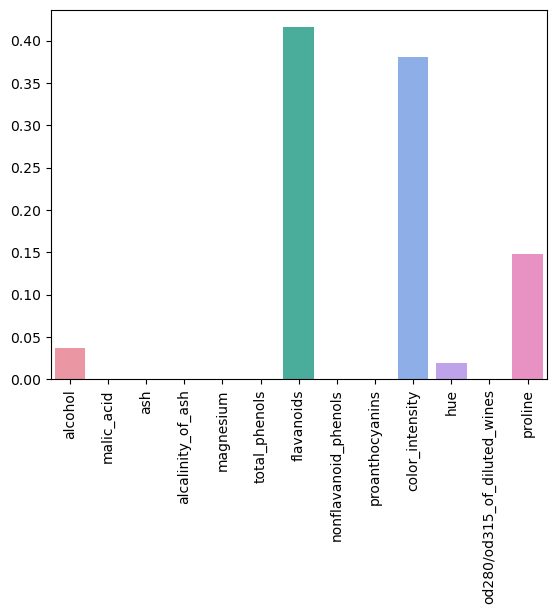

In [9]:
sns.barplot(x = data.feature_names, y = dt.feature_importances_)
plt.xticks(rotation = 90)

In [10]:
top_features = np.argsort(dt.feature_importances_)[::-1][:2]
top_features1_index = top_features[0]
top_features2_index = top_features[1]

X_train_selected = X_train[:, [top_features1_index, top_features2_index]]
X_test_selected = X_test[:, [top_features1_index, top_features2_index]]

dt_selected = DecisionTreeClassifier(random_state =42)
dt_selected.fit(X_train_selected, y_train)

y_train_pred_selected = dt_selected.predict(X_train_selected)

In [12]:
accuracy = accuracy_score(y_train, y_train_pred_selected)
print("정확도: ", accuracy)

정확도:  1.0


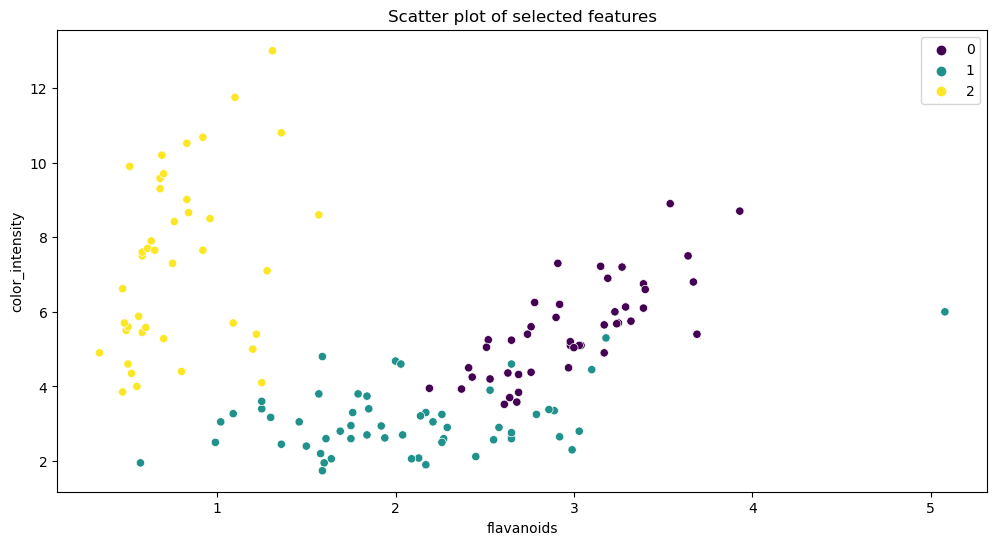

In [23]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train_selected[:, 0], y=X_train_selected[:, 1], hue=y_train, palette="viridis")
plt.title("Scatter plot of selected features")
plt.xlabel("flavanoids")
plt.ylabel("color_intensity")
plt.show()

<Axes: xlabel='flavanoids', ylabel='color_intensity'>

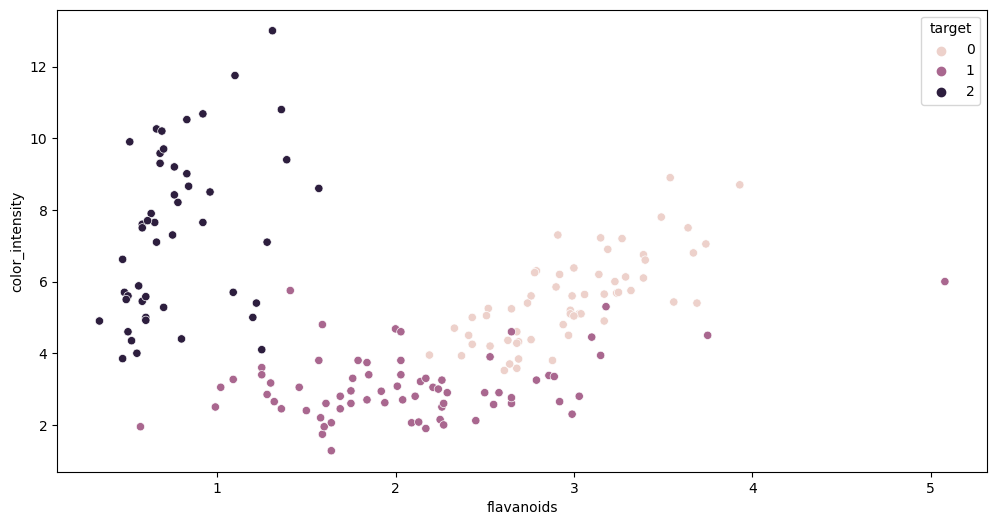

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='flavanoids', y='color_intensity', hue='target')